<a href="https://colab.research.google.com/github/gharashim/DL/blob/main/02_Machine_Learning_Basic_EX_06_Multi_In_Multi_Out_Blood_Pressure_LR_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

>### [예제 6] Multi-Variable Multi-Output L.R.(TF)

>### Load modules

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

if tf.__version__ >= '2.17.0':
    from tf_keras import optimizers
else:
    from tensorflow.keras import optimizers

print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

NumPy Version :1.26.4
TensorFlow Version :2.17.0
Matplotlib Version :3.7.1


> ### Input and Label

In [ ]:
#Input(AGE, BMI) and Labels(HIGH, LOW)
x_input = tf.constant([[25,22],[25,26],[25,30],[35,22],[35,26],[35,30],[45,22],[45,26],[45,30],[55,22],[55,26],[55,30],[65,22],[65,26],[65,30],[73,22],[73,26],[73,30]], dtype= tf.float32)
labels = tf.constant([[118,72],[125,80],[130,80],[118,76],[126,75],[123,79],[120,80],[124,85],[130,83],[122,78],[125,80],[130,81],[127,75],[130,79],[130,81],[125.5,80],[130,80],[138,82]], dtype= tf.float32)

W = tf.Variable(tf.random.normal((2, 2)), dtype=tf.float32)
B = tf.Variable(tf.random.normal((2,)), dtype=tf.float32)

In [ ]:
# Min Max Scaler
x_input_org = x_input
x_min, x_max = np.min(x_input, axis=0), np.max(x_input, axis=0)
x_input = (x_input-x_min)/(x_max-x_min)

In [ ]:
# Hypothesis
def Hypothesis(x):
  return tf.matmul(x, W) + B

>### Cost Function : Mean Squared Error (MSE)
>### $\sum_{i=1}^{n}(h(x_{i})-y_{i})^{2}$

In [ ]:
def Cost():
  return tf.reduce_mean(tf.square(Hypothesis(x_input)-labels))

### 학습 (Training)

In [ ]:
%%time
# Parameter Set
epochs = 2500
learning_rate = 0.05
optimizer = optimizers.SGD(learning_rate=learning_rate)

training_idx = np.arange(0, epochs+1, 1)
cost_graph = np.zeros(epochs+1)

for cnt in range(0, epochs+1):
  cost_graph[cnt] = Cost()
  if cnt % (epochs//20) == 0:
      print("[{:>6}] cost={:>6.4}, W = [[{:>7.4} {:>7.4}] [{:>7.4} {:>7.4}]], B = [{:>7.4}{:>7.4}]".format(cnt, cost_graph[cnt], W[0,0], W[0,1], W[1,0],W[1,1], B[0],B[1]))

  optimizer.minimize(Cost,[W, B])

[     0] cost=1.085e+04, W = [[-0.7102  0.1571] [   2.52 -0.0738]], B = [ 0.8308 0.5177]
[   125] cost=  91.6, W = [[  30.09   18.27] [  26.65   15.64]], B = [  95.36  60.66]
[   250] cost= 33.64, W = [[  21.68   12.27] [   17.7   10.11]], B = [  105.1   67.1]
[   375] cost= 14.88, W = [[  16.24   8.465] [   13.3    7.34]], B = [  110.5  70.76]
[   500] cost= 8.602, W = [[  12.85   6.123] [  11.07   5.907]], B = [  113.7  72.87]
[   625] cost=  6.47, W = [[  10.78   4.705] [  9.885    5.14]], B = [  115.5  74.09]
[   750] cost= 5.741, W = [[  9.532   3.856] [  9.245   4.719]], B = [  116.5   74.8]
[   875] cost= 5.491, W = [[   8.79   3.352] [  8.889   4.483]], B = [  117.2  75.21]
[  1000] cost= 5.405, W = [[  8.351   3.053] [  8.689    4.35]], B = [  117.5  75.45]
[  1125] cost= 5.375, W = [[  8.091   2.877] [  8.574   4.273]], B = [  117.7  75.59]
[  1250] cost= 5.365, W = [[  7.938   2.774] [  8.508   4.228]], B = [  117.8  75.67]
[  1375] cost= 5.362, W = [[  7.848   2.713] [   8.

>### Hypothesis Test

In [ ]:
print("[ Hypothesis test ]")

H_x = Hypothesis(x_input)
for x,h,l in zip(x_input_org, H_x, labels):
  print("Age:{}, BMI:{}=>BP:{:>7.4},{:>7.4} [label => {}]".format(x[0],x[1],h[0], h[1],l))

[ Hypothesis test ]
Age:25.0, BMI:22.0=>BP:  118.0,  75.79 [label => [118.  72.]]
Age:25.0, BMI:26.0=>BP:  122.2,  77.87 [label => [125.  80.]]
Age:25.0, BMI:30.0=>BP:  126.4,  79.96 [label => [130.  80.]]
Age:35.0, BMI:22.0=>BP:  119.6,  76.34 [label => [118.  76.]]
Age:35.0, BMI:26.0=>BP:  123.8,  78.42 [label => [126.  75.]]
Age:35.0, BMI:30.0=>BP:  128.0,   80.5 [label => [123.  79.]]
Age:45.0, BMI:22.0=>BP:  121.2,  76.88 [label => [120.  80.]]
Age:45.0, BMI:26.0=>BP:  125.4,  78.97 [label => [124.  85.]]
Age:45.0, BMI:30.0=>BP:  129.7,  81.05 [label => [130.  83.]]
Age:55.0, BMI:22.0=>BP:  122.8,  77.43 [label => [122.  78.]]
Age:55.0, BMI:26.0=>BP:  127.1,  79.51 [label => [125.  80.]]
Age:55.0, BMI:30.0=>BP:  131.3,   81.6 [label => [130.  81.]]
Age:65.0, BMI:22.0=>BP:  124.5,  77.98 [label => [127.  75.]]
Age:65.0, BMI:26.0=>BP:  128.7,  80.06 [label => [130.  79.]]
Age:65.0, BMI:30.0=>BP:  132.9,  82.14 [label => [130.  81.]]
Age:73.0, BMI:22.0=>BP:  125.7,  78.42 [label => [

In [ ]:
# predict
def predict(x):
  return Hypothesis((x-x_min)/(x_max-x_min))

In [ ]:
# predict
print("\n[ Prediction by specific data ]")
x_test = tf.constant([[50.0, 25.0]], dtype= tf.float32)
H_x = predict(x_test)
print("Age : {}, BMI : {} = > BP : {:>7.4}, {:>7.4}".format(x_test[0,0],x_test[0,1],H_x[0,0],H_x[0,1]))


[ Prediction by specific data ]
Age : 50.0, BMI : 25.0 = > BP :   125.2,   78.72


>### Plotting

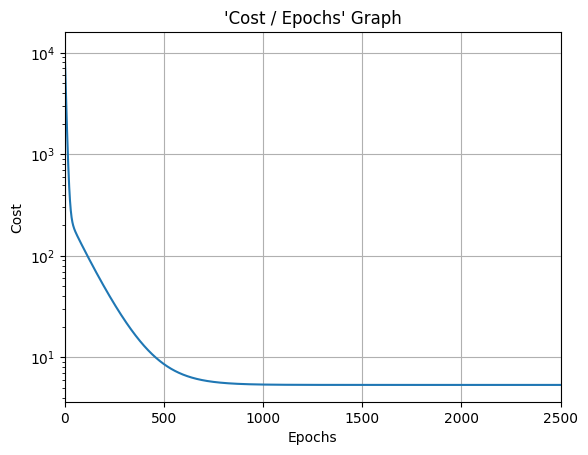

In [ ]:
# Training 상황에 대한 그래프 출력
# Training 회수 별 Cost 값
plt.title("'Cost / Epochs' Graph")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.plot(training_idx, cost_graph)
plt.xlim(0, epochs)
plt.grid(True)
plt.semilogy()
plt.show()